In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:

import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize

#set ggplot style
plt.style.use('ggplot')


In [3]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [4]:
#results

In [5]:
#print(requests.get(url))

In [6]:
#print(requests.get(url).json())

In [7]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [8]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [9]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [10]:
#Reorganizing the columns using double brackets
organized_df = health_df[["locationabbr","year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","response","education", "geolocation"]]
organized_df.head()

,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,response,education,geolocation
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [11]:
renamed_df = organized_df.rename(columns={"locationabbr":"Location Code","year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Users","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","response":"User Status","education":"Education"})
renamed_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [12]:
Minus_Nat= renamed_df.loc[renamed_df["State"] !="National (States and DC)"]
Minus_PR = Minus_Nat.loc[Minus_Nat["State"] !="Puerto Rico"]
Minus_NatPRGuam = Minus_PR.loc[Minus_PR["State"] !="Guam"]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-106.2405809..."
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."


In [13]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()
#USA.count()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-97.52107021..."
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
5,DE,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-75.57774116..."
7,AL,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."


In [16]:
USA[['% of Users']]=USA[['% of Users']].astype(float)

In [17]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
grouped_usa_df = USA.groupby(['Year','Gender']).mean()

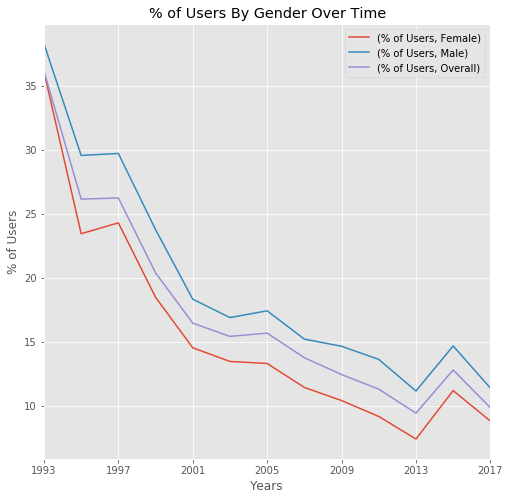

In [58]:

# Use unstack() to Plot all users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
grouped_usa_df.unstack().plot(ax=ax)
plt.title("% of Users By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("% of Users")
leg = ax.legend()







In [19]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
23,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,42.1,119,Overall,All Ages,Hispanic,Ever,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
41,IN,2015,Indiana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,118,Overall,All Ages,Multiple Race,Current,High School,"{'type': 'Point', 'coordinates': [-86.14996019..."
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-81.04537120..."
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-72.08269067..."
131,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,51.6,2490,Overall,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-111.7638112..."


In [20]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()

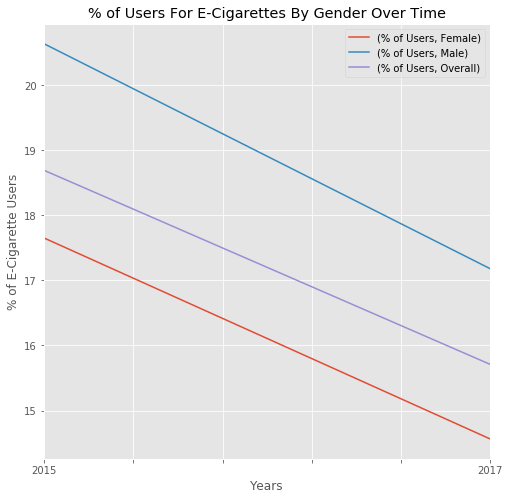

In [60]:
# Use unstack() to Plot the E-Cigarette users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
USA_eCig_Avg.unstack().plot(ax=ax)
plt.title("% of Users For E-Cigarettes By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("% of E-Cigarette Users")
leg = ax.legend()




In [22]:
grouped_usa_Ethinicity = USA.groupby(['Year','Race']).mean()

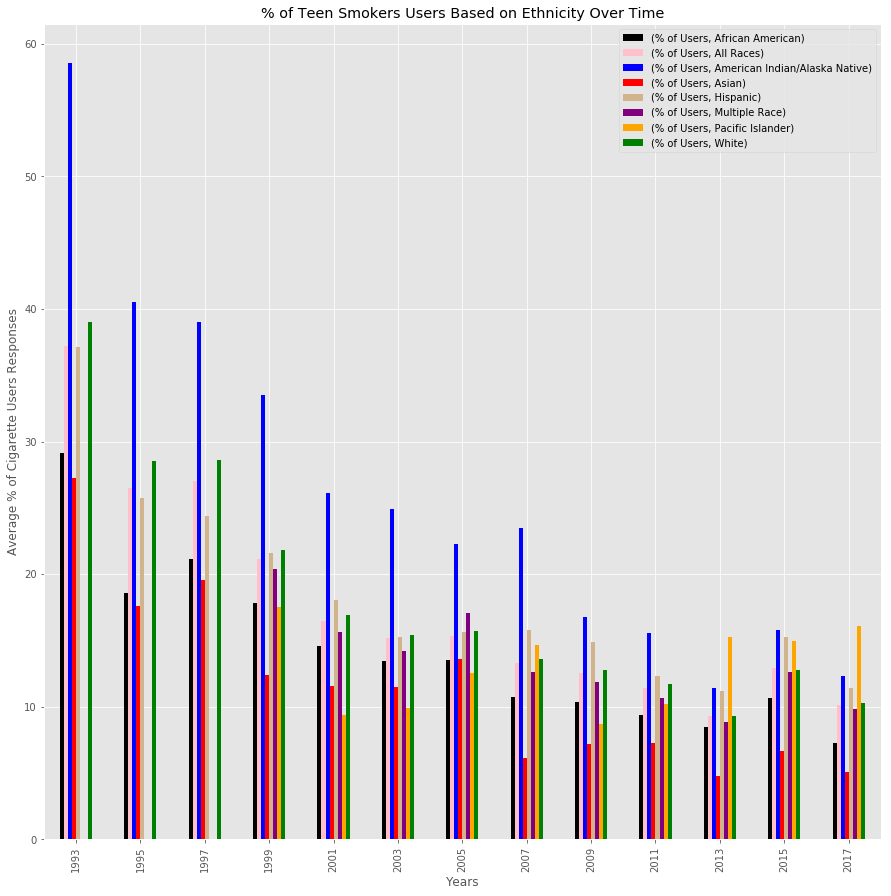

In [64]:
fig, ax = plt.subplots(figsize=(15,15))
colors = ["black","pink","blue","red","tan","purple","orange","green"]
grouped_usa_Ethinicity.unstack().plot.bar(ax=ax, color=colors)
plt.title("% of Teen Smokers Users Based on Ethnicity Over Time")
plt.xlabel("Years")
plt.ylabel("Average % of Cigarette Users Responses")
leg = ax.legend()

In [24]:
USA_eCig_Etinicity = USA_eCig.groupby(['Year','Race']).mean()

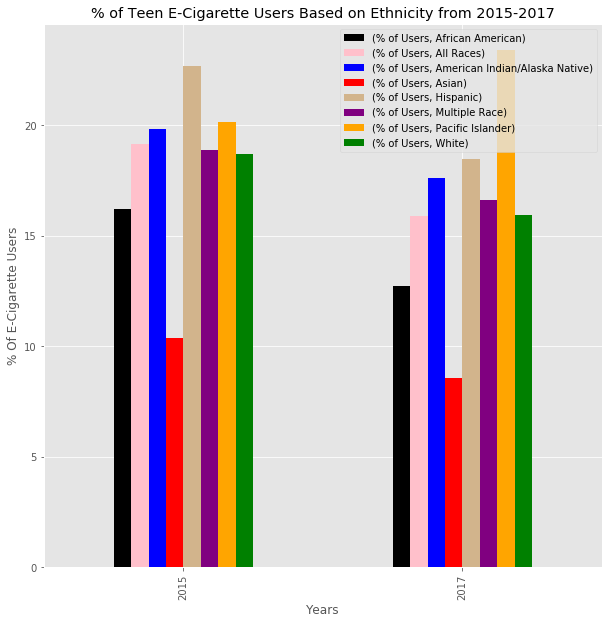

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ["black","pink","blue","red","tan","purple","orange","green"]
USA_eCig_Etinicity.unstack().plot.bar(ax=ax, color= colors)
plt.title("% of Teen E-Cigarette Users Based on Ethnicity from 2015-2017")
plt.xlabel("Years")
plt.ylabel("% Of E-Cigarette Users")
leg = ax.legend()

In [26]:
grouped_usa_User_Status = USA.groupby(['Year','User Status']).mean()

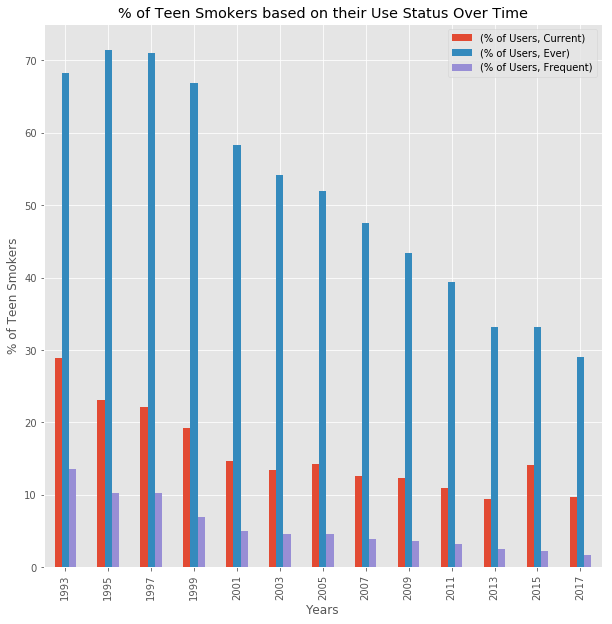

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("% of Teen Smokers based on their Use Status Over Time")
plt.xlabel("Years")
plt.ylabel("% of Teen Smokers")
leg = ax.legend()

In [28]:
E_Cig_grouped_usa_User_Status = USA_eCig.groupby(['Year','User Status']).mean()

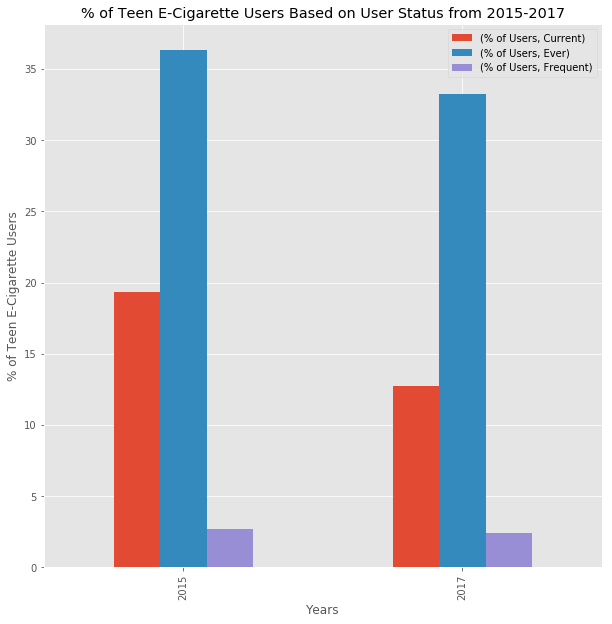

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
E_Cig_grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("% of Teen E-Cigarette Users Based on User Status from 2015-2017")
plt.xlabel("Years")
plt.ylabel("% of Teen E-Cigarette Users")
leg = ax.legend()

In [30]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_Use_type_grp=USA.groupby(['Year','Use Type']).mean()
USA_Use_type_grp.head()

% of Users
Year Use Type                                 
1993 Cigarette Use (Youth)           36.571579
1995 Cigarette Use (Youth)           37.818543
     Smokeless Tobacco Use (Youth)    7.964737
1997 Cigarette Use (Youth)           40.188418
     Smokeless Tobacco Use (Youth)    6.419583

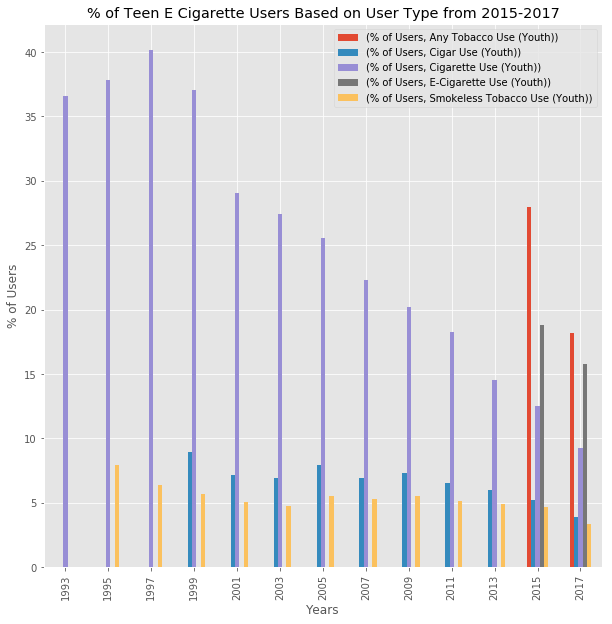

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
USA_Use_type_grp.unstack().plot.bar(ax=ax)
plt.title("% of Teen E Cigarette Users Based on User Type from 2015-2017")
plt.xlabel("Years")
plt.ylabel("% of Users")
leg = ax.legend()

In [32]:
Avg_USA=USA[['% of Users']]=USA[['% of Users']].astype(float)

In [33]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
2366,US,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7244,US,1995,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,US,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [34]:
no_null_National =National.dropna(how='any')
no_null_National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
2366,US,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7236,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7251,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7261,US,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
7282,US,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.9,372,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [35]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
149,OH,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
246,OH,2005,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Multiple Race,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
287,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,American Indian/Alaska Native,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
365,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
478,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [36]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
478,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
494,OH,2003,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4,544,Male,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
572,OH,2005,Ohio,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.2,661,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
696,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,51.5,1339,Overall,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
831,OH,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.2,864,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [37]:
no_null_National.dtypes

Location Code    object
Year             object
State            object
Use Type         object
Status           object
Frequency        object
% of Users       object
Sample Size      object
Gender           object
Age              object
Race             object
User Status      object
Education        object
geolocation      object
dtype: object

In [38]:
#no_null_State.t0 float
no_null_National[['% of Users']]=no_null_National[['% of Users']].astype(float)

In [39]:
no_null_OH[['% of Users']]=no_null_OH[['% of Users']].astype(float)

In [40]:
no_null_OH.dtypes

Location Code     object
Year              object
State             object
Use Type          object
Status            object
Frequency         object
% of Users       float64
Sample Size       object
Gender            object
Age               object
Race              object
User Status       object
Education         object
geolocation       object
dtype: object

In [41]:
no_null_National.dtypes

Location Code     object
Year              object
State             object
Use Type          object
Status            object
Frequency         object
% of Users       float64
Sample Size       object
Gender            object
Age               object
Race              object
User Status       object
Education         object
geolocation       object
dtype: object

In [42]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Location Code','Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [43]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Users
Location Code Year Use Type                      Status         Frequency                       Gender  Age      Race             Education              
OH            1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School        29.0
                                                                                                Male    All Ages All Races        High School        30.4
                                                                                                Overall All Ages African American High School        14.2
                                                                                                                 All Races        High School        29.7
                                                                                                                 White            High School        32.8
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School        66.0
                                                                                                Male    All Ages All Races        High School        71.0
                                                                                                Overall All Ages African American High School        65.1
                                                                                                                 All Races        High School        68.6
                                                                                                                 White            High School        68.8
                                                                Frequent Cigarette Smoker       Female  All Ages All Races        High School        12.3
                                                                                                Male    All Ages All Races        High School        16.1
                                                                                                Overall All Ages African American High School         3.3
                                                                                                                 All Races        High School        14.3
                                                                                                                 White            High School        16.6
              1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School        32.0
                                                                                                Male    All Ages All Races        High School        36.9
                                                                                                Overall All Ages African American High School        19.6
                                                                                                                 All Races        High School        34.5
                                                                                                                 White            High School        38.1
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School        67.8
                                                                                                Male    All Ages All Races        High School        70.5
                                                                                                Overall All Ages African American High School        67.3
                                                                                                                 All Races        High School        69.2
                                                                                                                 White            High Scho

In [44]:
latlon = (pd.concat({i: json_normalize(x) for i, x in USA.pop('geolocation').items()})
         .reset_index(level=1, drop=True)
         .join(USA)
         .reset_index(drop=True))
latlon.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education
0,"[-97.521070214, 35.472031356]",Point,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School
1,"[-75.543970427, 42.827001032]",Point,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School
2,"[-81.045371207, 33.998821303]",Point,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School
3,"[-75.577741168, 39.008830667]",Point,DE,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,Current,High School
4,"[-86.631860762, 32.840571122]",Point,AL,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,Frequent,High School


In [45]:
latlon2 = pd.DataFrame(latlon["coordinates"].values.tolist())
latlon2.head()

,0,1
0,-97.521070,35.472031
1,-75.543970,42.827001
2,-81.045371,33.998821
3,-75.577741,39.008831
4,-86.631861,32.840571


In [46]:
renamedlatlon = latlon2.rename(columns={0:"Lon",1:"Lat"})
renamedlatlon.head()

,Lon,Lat
0,-97.521070,35.472031
1,-75.543970,42.827001
2,-81.045371,33.998821
3,-75.577741,39.008831
4,-86.631861,32.840571


In [47]:
mergedlatlon = pd.merge(latlon, renamedlatlon, left_index=True, right_index=True, how='inner')
mergedlatlon

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
0,"[-97.521070214, 35.472031356]",Point,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,Frequent,High School,-97.521070,35.472031
1,"[-75.543970427, 42.827001032]",Point,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,Frequent,High School,-75.543970,42.827001
2,"[-81.045371207, 33.998821303]",Point,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,Frequent,High School,-81.045371,33.998821
3,"[-75.577741168, 39.008830667]",Point,DE,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,Current,High School,-75.577741,39.008831
4,"[-86.631860762, 32.840571122]",Point,AL,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,Frequent,High School,-86.631861,32.840571
5,"[-100.373530637, 44.353130053]",Point,SD,2009,South Dakota,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.5,1069,Female,All Ages,All Races,Current,High School,-100.373531,44.353130
6,"[-100.118421049, 47.475319779]",Point,ND,2013,North Dakota,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,2.2,1006,Male,All Ages,All Races,Frequent,High School,-100.118421,47.475320
7,"[-71.522470314, 41.708280193]",Point,RI,1997,Rhode Island,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.3,1457,Overall,All Ages,All Races,Frequent,High School,-71.522470,41.708280
8,"[-72.517640791, 43.625381239]",Point,VT,2011,Vermont,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,15.1,229,Overall,All Ages,African American,Current,High School,-72.517641,43.625381
9,"[-108.109830353, 43.235541343]",Point,WY,2015,Wyoming,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.8,1203,Female,All Ages,All Races,Frequent,High School,-108.109830,43.235541


In [48]:
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2017 = ECig_User.loc[ECig_User["Year"] =="2017"]
ECig_2017

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
15710,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Current,Middle School,-78.457890,37.542681
15777,"[-80.712640135, 38.665510202]",Point,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,Current,High School,-80.712640,38.665510
15779,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,Current,High School,-85.774491,35.680941
15895,"[-99.365720623, 41.641040988001]",Point,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,Current,High School,-99.365721,41.641041
15934,"[-76.609260111, 39.290580964]",Point,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,Current,High School,-76.609260,39.290581
15952,"[-75.577741168, 39.008830667]",Point,DE,2017,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.7,2814,Overall,All Ages,All Races,Current,Middle School,-75.577741,39.008831
15987,"[-106.240580985, 34.520880952]",Point,NM,2017,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,10.9,6713,Overall,All Ages,All Races,Current,Middle School,-106.240581,34.520881
16086,"[-120.999999538, 37.638640123]",Point,CA,2017,California,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1673,Overall,All Ages,All Races,Current,High School,-121.000000,37.638640
16127,"[-89.816370742, 44.393191174]",Point,WI,2017,Wisconsin,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.6,1869,Overall,All Ages,All Races,Current,High School,-89.816371,44.393191
16161,"[-147.722059036, 64.845079957001]",Point,AK,2017,Alaska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,1233,Overall,All Ages,All Races,Current,High School,-147.722059,64.845080


In [49]:
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2015 = ECig_User.loc[ECig_User["Year"] =="2015"]
ECig_2015

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
35,"[-81.045371207, 33.998821303]",Point,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,Current,High School,-81.045371,33.998821
59,"[-72.082690675, 42.27687047]",Point,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,Current,High School,-72.082691,42.276870
1619,"[-78.457890463, 37.542680674]",Point,VA,2015,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.6,2225,Overall,All Ages,All Races,Current,Middle School,-78.457890,37.542681
2255,"[-111.763811277, 34.86597028]",Point,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,27.5,2528,Overall,All Ages,All Races,Current,High School,-111.763811,34.865970
2300,"[-84.71439027, 44.661319543001]",Point,MI,2015,Michigan,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.0,4803,Overall,All Ages,All Races,Current,High School,-84.714390,44.661320
2353,"[-88.997710178, 40.485010283]",Point,IL,2015,Illinois,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,26.6,3173,Overall,All Ages,All Races,Current,High School,-88.997710,40.485010
2385,"[-84.774971048, 37.645970271]",Point,KY,2015,Kentucky,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,12.1,1562,Overall,All Ages,All Races,Current,Middle School,-84.774971,37.645970
2903,"[-84.774971048, 37.645970271]",Point,KY,2015,Kentucky,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,2525,Overall,All Ages,All Races,Current,High School,-84.774971,37.645970
2996,"[-81.928960539, 28.932040377]",Point,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,-81.928961,28.932040
3857,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.5,2662,Overall,All Ages,All Races,Current,High School,-75.577741,39.008831


In [51]:
# Store 'Lat' and 'Lng' into  locations 
locations2015 = ECig_2015[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2015 = ECig_2015["% of Users"].astype(float)

In [52]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2015, weights=Users2015, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# Store 'Lat' and 'Lng' into  locations 
locations2017 = ECig_2017[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2017 = ECig_2017["% of Users"].astype(float)

In [55]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2017, weights=Users2017, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
#drop ever and frequent users in "frequency" column
USA = USA[~USA['Frequency'].isin(['Ever Cigarette Smoker','Ever E-Cigarette User','Frequent Cigar Smoker','Frequent Cigarette Smoker','Frequent E-Cigarette User','Frequent Smokeless Tobacco User','Current Tobacco User'])]

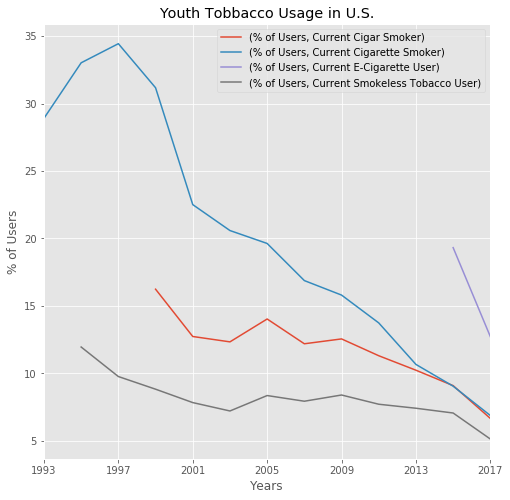

In [57]:
USA[['% of Users']]=USA[['% of Users']].astype(float)
smoking_by_type = USA.groupby(['Year','Frequency']).mean()
fig, ax = plt.subplots(figsize=(8,8))
smoking_by_type.unstack().plot(ax=ax)
plt.title("Youth Tobbacco Usage in U.S.")
plt.xlabel("Years")
plt.ylabel("% of Users")
leg = ax.legend()